## Moments

Python implementation of Image Moments, validated with opencv.

    * Raw moments
    * Central Moments: translation invariance
    * Scale Invariants
    * Hu Moments: rotation invariant
    
#### Applications:
    * blob detection, centroids,
    * Image intensity rotation angles
    * countour matching

https://en.wikipedia.org/wiki/Image_moment

https://github.com/opencv/opencv/blob/master/modules/imgproc/src/moments.cpp

#### match contours:
https://github.com/opencv/opencv/blob/master/imgproc/src/matchcontours.cpp
#### features:
https://github.com/opencv/opencv/blob/master/modules/features2d/src/blobdetector.cpp

https://github.com/opencv/opencv/blob/master/modules/features2d/src/evaluation.cpp
#### camera tracking
https://github.com/opencv/opencv/blob/master/modules/video/src/camshift.cpp
#### demo
https://github.com/opencv/opencv/blob/master/samples/cpp/tutorial_code/ShapeDescriptors/moments_demo.cpp
#### contour centroids
https://docs.opencv.org/3.4.12/d0/d49/tutorial_moments.html

#### match rotation and translation in brain images. 
https://content.iospress.com/articles/bio-medical-materials-and-engineering/bme1426



In [7]:
%config IPCompleter.use_jedi = False
# %xmode Verbose
# %xmode context
%pdb off
# %load_ext viztracer
# from viztracer import VizTracer
%load_ext autoreload
%autoreload 3
from copy import deepcopy
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from pyphoplacecellanalysis.Analysis.Decoder.computer_vision import ComputerVisionComputations

Automatic pdb calling has been turned OFF
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
images_parent_path = Path(r'C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\_temp_individual_posteriors\2024-08-21\laps\greyscale').resolve()
assert images_parent_path.exists()

active_image_path = Path(r"C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\_temp_individual_posteriors\2024-08-21\laps\greyscale\p_x_given_n[2].png")
pimg = Image.open(active_image_path)
img = np.array(pimg)
r = deepcopy(img)


type(img): <class 'numpy.ndarray'>
np.shape(img): (1024, 449)
img.dtype: uint8


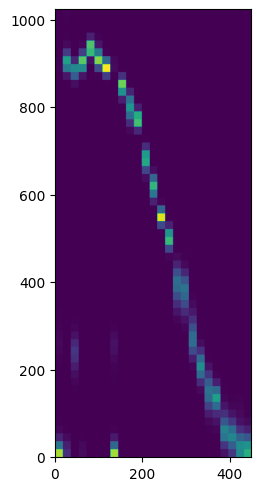

In [27]:
lap_path = r"C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\_temp_individual_posteriors\2024-08-27\laps\greyscale\p_x_given_n[16].png"

replay_paths = [
	r"C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\_temp_individual_posteriors\2024-08-27\ripple\greyscale\p_x_given_n[45].png",
	r"C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\_temp_individual_posteriors\2024-08-27\ripple\greyscale\p_x_given_n[48].png",
	r"C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\_temp_individual_posteriors\2024-08-27\ripple\greyscale\p_x_given_n[51].png",
]


lap_img = ComputerVisionComputations.load_image(lap_path)
replay_imgs = [ComputerVisionComputations.load_image(p) for p in replay_paths]

ComputerVisionComputations.imshow(lap_img)
ComputerVisionComputations.debug_print_img_info(lap_img)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x27de62faa30>)

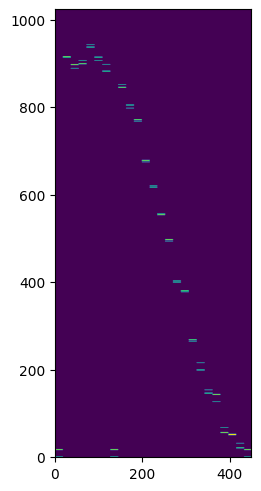

In [22]:
lap_bw_top_values_mask, lap_masked_img = ComputerVisionComputations.top_N_values_binarization(lap_img, top_n=3, non_included_index_value=0)
ComputerVisionComputations.imshow(lap_bw_top_values_mask)
# ComputerVisionComputations.imshow(lap_masked_img)


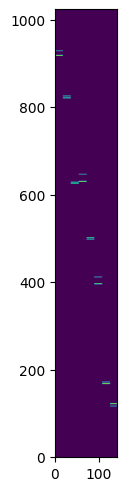

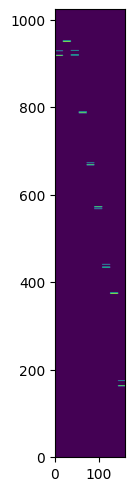

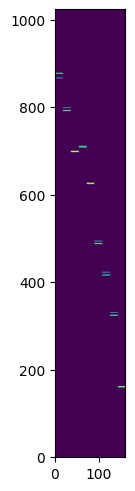

In [23]:

replay_bw_top_values_masks = []
for img in replay_imgs:
	bw_top_values_mask, masked_img = ComputerVisionComputations.top_N_values_binarization(img, top_n=3, non_included_index_value=0)
	replay_bw_top_values_masks.append(bw_top_values_mask)
	ComputerVisionComputations.imshow(bw_top_values_mask)
	

# plt.figure(); plt.imshow(bw_top_values_mask)
# plt.figure(); plt.imshow(masked_img)






(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x27de83361f0>)

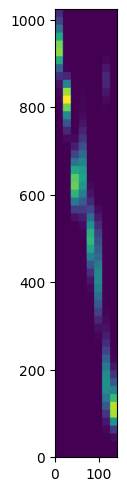

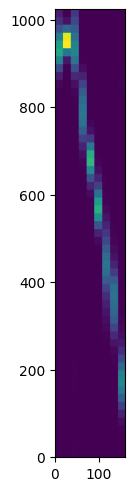

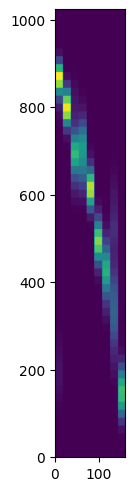

In [24]:

ComputerVisionComputations.imshow(replay_imgs[0])
ComputerVisionComputations.imshow(replay_imgs[1])
ComputerVisionComputations.imshow(replay_imgs[2])



In [26]:
np.shape(replay_imgs[0])

(1024, 143)

In [19]:
# import io
# import requests
# url = "https://i.guim.co.uk/img/media/abea6c172005fdb1bdb58ec414cac103cc17fbcf/0_0_3200_2133/master/3200.jpg?width=1920&quality=85&auto=format&fit=max&s=85ad7aacebff455b845b05c43dbbd8c6"
# req = requests.get(url)
# print (req)
# pimg = Image.open(io.BytesIO(req.content))
# img = np.array(pimg)
# r = img[:,:,0] # just the red component of the image

<Response [200]>


In [55]:
moments, hu_moments, *extras = ComputerVisionComputations.image_moments(lap_img)
moments

Area 459776
intensity orientation -25.824 deg, centroid (224.34, 463.13)


{'m00': 3118680.0,
 'm10': 699639624.0,
 'm01': 1444349412.0,
 'm20': 209245527132.0,
 'm11': 234002313450.0,
 'm02': 1039881541344.0,
 'm30': 70398511881426.0,
 'm21': 50623345357536.0,
 'm12': 140911543598088.0,
 'm03': 829735817744484.0,
 'mu20': 52289506164.519745,
 'mu11': -90020696136.20345,
 'mu02': 370962247301.40967,
 'mu30': -4377414845.1170435,
 'mu21': -5894015218999.898,
 'mu12': -8991508823495.59,
 'mu03': 4530762939938.776,
 'nu20': 0.005376168970420209,
 'nu11': -0.009255518148141769,
 'nu02': 0.03814064942331444,
 'nu30': -2.548535388429645e-07,
 'nu21': -0.00034315016732581376,
 'nu12': -0.0005234865609691422,
 'nu03': 0.0002637814805672313}

(1024, 4060)
(1024, 4060)


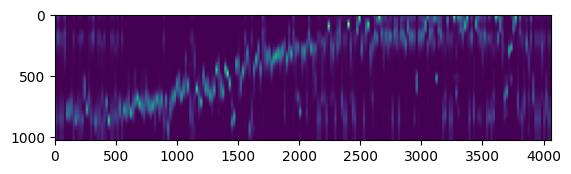

In [30]:
print(img.shape) # (1280, 1920, 3)
print(r.shape) # (1280, 1920)
plt.imshow(img)
plt.show()

## OpenCV moments on Intensity, per channel

In [31]:
moments = cv2.moments(r)
# m_ij: raw moments
# mu_ij: central moments, translation invariant
# nu_ij: scale invariants
hu_moments = cv2.HuMoments(moments)
# hu moments, rotation invariant

In [32]:
moments

{'m00': 54091530.0,
 'm10': 109752618465.0,
 'm01': 24990157514.0,
 'm20': 296777921305101.0,
 'm11': 42706648929110.0,
 'm02': 16158006586632.0,
 'm30': 9.029157679257795e+17,
 'm21': 1.0873271374187058e+17,
 'm12': 2.595470415435648e+16,
 'm03': 1.1801507374234656e+16,
 'mu20': 74088024015749.8,
 'mu11': -7998798356524.092,
 'mu02': 4612613572706.702,
 'mu30': 96727105761360.9,
 'mu21': 4081414884399640.5,
 'mu12': 560690149704431.7,
 'mu03': 74514087513190.44,
 'nu20': 0.025321502998784214,
 'nu11': -0.002733796713600275,
 'nu02': 0.0015764802741762458,
 'nu30': 4.494951691714738e-06,
 'nu21': 0.00018966516773988255,
 'nu12': 2.6055521015583687e-05,
 'nu03': 3.4627028389573825e-06}

## Raw Moments


$ M_{ij} = \sum_x \sum_y x^iy^j I(x,y) $ with pixel intensities   $ I(x,y)$

$ M_{00} = \sum_x \sum_y I(x,y) \text{ : Itensities}$

$ M_{11} = \sum_x \sum_y xy I(x,y) \text{ : Itensities . Positions}$

$ M_{20} = \sum_x \sum_y x^2 I(x,y) \text{ }$

    ... 

In [38]:
## Moments returned in xy
def moment_raw(r, i, j):
    _x = np.arange(r.shape[0])**j
    _y = np.arange(r.shape[1])**i
    _XX, _YY = np.meshgrid(_y, _x)
    return (_XX*_YY*r).sum()

def centroid(M00,M10,M01):
    return M10/(M00 + 1e-5), M01/(M00 + 1e-5)

In [39]:
print("Area", np.prod(np.asarray(r.shape)))

Area 4157440


In [40]:
M00 = moment_raw(r, 0,0)
M10 = moment_raw(r, 1,0)
M01 = moment_raw(r, 0,1)
M11 = moment_raw(r, 1,1)
M20 = moment_raw(r, 2,0)
M02 = moment_raw(r, 0,2)
M21 = moment_raw(r, 2,1)
M12 = moment_raw(r, 1,2)
M30 = moment_raw(r, 3,0)
M03 = moment_raw(r, 0,3)
x_, y_ = centroid(M00, M10, M01)

M00, M11, M10

(54091530, 1789104982, -1916531231)

### central moments
    translationally invariant

$ \mu_{pq} = \sum_x \sum_y (x - \bar{x})^p (y - \bar{y})^q f(x,y) $

In [43]:
mu00 = M00 
mu01 = 0
mu10 = 0
mu11 = M11 - x_* M01 # = M11 - y_* M10
mu20 = M20 - x_ * M10
mu02 = M02 - y_ * M01
mu21 = M21 - 2*x_ * M11 - y_ * M20 + 2 * x_**2 * M01
mu12 = M12 - 2*y_ * M11 - x_ * M02 + 2 * y_**2 * M10

mu30 = M30 - 3*x_ * M20 + 2 * x_**2 * M10
mu03 = M03 - 3*y_ * M02 + 2 * y_**2 * M01

mu11, mu20, mu02, mu21, mu12, mu30, mu03

(-25834746853.123398,
 -67929003491.04947,
 -10897783408.900948,
 -1832233229219.9338,
 -730666934992.5044,
 -4812700032427.343,
 -311152758391.5845)

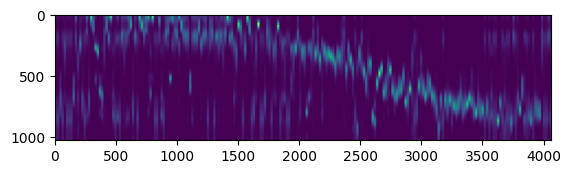

mu20 = flipmu20 (74088024015749.8 = 74088024015749.8)
mu21 = flipmu21 (4081414884399763.5 = 4081414884399640.5)
...
 central moments are translationally invariant


In [42]:
imflip = np.array(pimg.transpose(Image.FLIP_LEFT_RIGHT))
plt.imshow(imflip)
plt.show()
if np.ndim(imflip) > 2:
	imflip = imflip[:,:, 0]
flipmoments = cv2.moments(imflip)
print("mu20 = flipmu20 (%.1f = %.1f)"%(flipmoments["mu20"], moments["mu20"]))
print("mu21 = flipmu21 (%.1f = %.1f)"%(flipmoments["mu21"], moments["mu21"]))
print("...\n central moments are translationally invariant")


### Image Orientation Covariance Matrix from second order central moments
    from wikipedia

$ \mu'_{20} = \frac{\mu_{20}}{\mu_{00}} = \frac{M_{20}}{M_{00}} - \bar{x}^2$

$ \mu'_{02} = \frac{\mu_{02}}{\mu_{00}} = \frac{M_{02}}{M_{00}} - \bar{y}^2$

$ \mu'_{11} = \frac{\mu_{11}}{\mu_{00}} = \frac{M_{11}}{M_{00}} - \bar{x}\bar{y}$

$ \text{cov}[I(x,y)] = \begin{bmatrix} \mu'_{20} & \mu'_{11} \\\mu'_{11} & \mu'_{02}   \end{bmatrix}$ 

    eigenvectors major and minor axis of intensity
    angle to nearest eigenvector
    
$\Theta = \frac{1}{2}\text{arctan}\left(\frac{2\mu'_{11}} {\mu'_{20} - \mu_{02}}\right) $

    eigenvalues
$\lambda_i = \frac{\mu'_{20} + \mu'_{02}}{2} \pm \frac{\sqrt{4\mu'_{11}*2 +(\mu'_{20} - \mu_{02})^2}}{2}$

In [44]:
# mu00 == m00
mup_20 = mu20/mu00 - x_**2
mup_02 = mu02/mu00 - y_**2
mup_11 = mu11/mu00 - x_*y_

theta = np.arctan(2*mup_11/(mup_20 - mup_02))/2
print("intensity orientation %.3f deg, centroid (%.2f, %.2f)"%((theta*180/np.pi), x_, y_))

cov_Ixy = np.array([[mup_20, mup_11],[mup_11, mup_02]])
cov_Ixy

intensity orientation 21.620 deg, centroid (-35.43, -14.41)


array([[-2511.19030612,  -988.29888318],
       [ -988.29888318,  -409.21722676]])

In [45]:
def intensity_orientation(img, moments, figsize=(15,8)):
    
    #m00, m10, m01, m11, m20, m02,
    center = np.array(img.shape[:2])/2
    
    # centroid
    x_, y_ =  moments["m10"]/(moments["m00"] + 1e-5), moments["m01"]/(moments["m00"] + 1e-5)
    
    # second order central moments
    mup_20 = moments["mu20"]/moments["m00"] - x_**2
    mup_02 = moments["mu02"]/moments["m00"] - y_**2
    mup_11 = moments["mu11"]/moments["m00"] - x_*y_

    # angle
    theta = np.arctan(2*mup_11/(mup_20 - mup_02))/2
    print("intensity orientation %.3f deg, centroid (%.2f, %.2f)"%((theta*180/np.pi), x_, y_))
    
    
    # intensity covariance
    cov_Ixy = np.array([[mup_20, mup_11],[mup_11, mup_02]])
    print("cov I(x,y)\n", cov_Ixy)
    
    # eigen vectors and values
    evals, evecs = np.linalg.eig(cov_Ixy)
    
    print("evals\n", evals)
    print("evecs\n", evecs)

    plt.figure(figsize=figsize)
    plt.imshow(img)

    for e, v in zip(evals, evecs):
        plt.plot([x_, np.sqrt(np.abs(e))*v[0]+x_], [y_, np.sqrt(np.abs(e))*v[1]+y_], 'r-', lw=2)

    plt.scatter(x_, y_, color="yellow")
    plt.annotate("I(x,y) centroid",[ x_+15, y_-10], color="yellow" )

    plt.xticks([0, x_, img.shape[1]], [0, int(x_), img.shape[1]])
    plt.yticks([0, y_, img.shape[0]], [0, int(y_), img.shape[0]])

    plt.grid()
    plt.show()

intensity orientation 19.825 deg, centroid (2029.02, 462.00)
cov I(x,y)
 [[-2747229.98727378 -1085276.11702127]
 [-1085276.11702127  -128167.56045197]]
evals
 [-3138491.60342037   263094.05569463]
evecs
 [[-0.940732    0.33915086]
 [-0.33915086 -0.940732  ]]


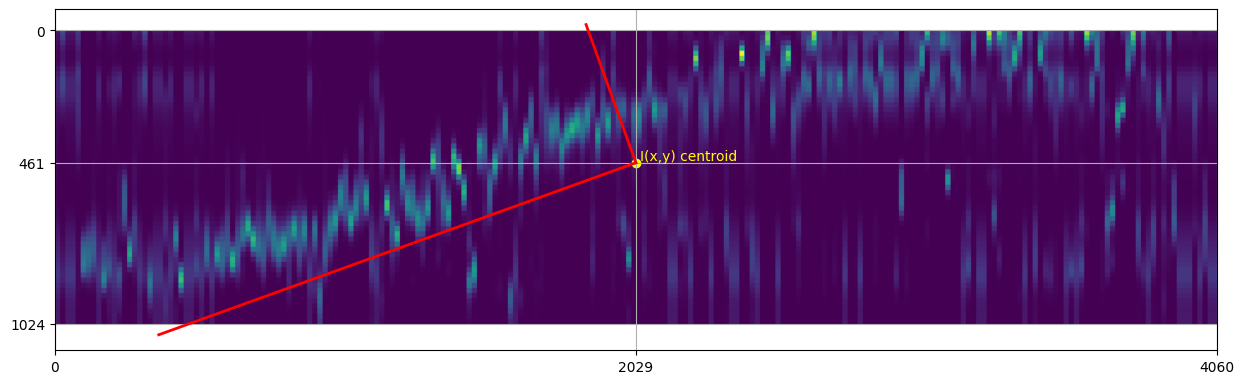

In [46]:
intensity_orientation(img, moments)

intensity orientation -15.531 deg, centroid (462.00, 2029.98)
cov I(x,y)
 [[ -128167.56045197  -789972.17692214]
 [ -789972.17692214 -2751153.30164591]]
evals
 [   91375.0322692  -2970695.89436708]
evecs
 [[ 0.9634846   0.26776374]
 [-0.26776374  0.9634846 ]]


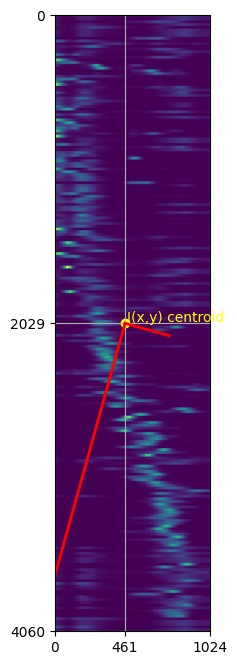

In [47]:
imrot = np.array(pimg.transpose(Image.ROTATE_90))
if np.ndim(imrot) > 2:
	imrot = imrot[:,:, 0]
rm = cv2.moments(imrot)
intensity_orientation(imrot, rm)

## scale invariants

$ \eta_{ij} = \frac{\mu_{ij}}{\mu{00}^{(1 + \frac{i+j}{2})}}$

In [13]:
# mu13, ... are set to 1 for convenience - not computed or used
mus = np.array([[mu00, mu01, mu02, mu03],[mu10,mu11,mu12, 1],[mu20,mu21, 1, 1],[mu30,1, 1, 1]])
for i, _mu in enumerate(mus):
    for j, _muu in enumerate(_mu):
        if i + j <= 3:
            print("mu%d%d\t"%(i, j),_muu)

mu00	 54091530.0
mu01	 0.0
mu02	 -10897783408.900948
mu03	 -311152758391.5845
mu10	 0.0
mu11	 -25834746853.123398
mu12	 -730666934992.5044
mu20	 -67929003491.04947
mu21	 -1832233229219.9338
mu30	 -4812700032427.343


In [14]:
nus = lambda i, j, mus: mus[i,j]/ (mus[0,0]**(1 + (i+j)/2))

for ij in [(2,0), (1,1), (0,2), (3,0), (2,1), (1,2), (0, 3)]:
    print("nu%d%d\t"%(ij[0], ij[1]), nus(*ij, mus))

nu20	 -2.3216498056924522e-05
nu11	 -8.829694523572787e-06
nu02	 -3.7246000137609895e-06
nu30	 -2.236483143189055e-07
nu21	 -8.514469432815401e-08
nu12	 -3.395441794389498e-08
nu03	 -1.4459407285115505e-08


In [15]:
imgsz = np.array(pimg.resize(tuple(np.array(pimg.size)//2), resample=Image.LANCZOS))
if np.ndim(imgsz) > 2:
	imgsz = imgsz[:,:, 0]
szmoments = cv2.moments(imgsz)
for k in szmoments:
    if "nu" in k:
        print(k, szmoments[k])
print("\nresized image have the same scale invariant moments ")

nu20 0.025297425406401453
nu11 -0.002729542590154693
nu02 0.0015762924953756279
nu30 3.011425502335925e-06
nu21 0.00018952729521586788
nu12 2.6058687433646066e-05
nu03 3.4651553244596683e-06

resized image have the same scale invariant moments 


### rotation invariants Hu moments
    based on scale invariants, neither independent nor complete? (Flusser 2000)

$ I_1 = \eta_{20} + \eta_{02}$      **moment of inertia**

$ I_2 = (\eta_{20} - \eta_{02})^2 + 4\eta_{11}^2 $

$ I_3 = (\eta_{30} - 3\eta_{12})^2 +(3\eta_{21} - \eta_{03})^2 $

$ I_4 = (\eta_{30} + \eta_{12})^2 +(\eta_{21} - \eta_{03})^2 $

$ I_5 = (\eta_{30} - 3\eta_{12})(\eta_{30} +\eta_{12}) [(\eta_{30} + \eta_{12})^2  - 3(\eta_{21} - \eta_{03})^2] + (3\eta_{21} - \eta_{03})(\eta_{21} +\eta_{02}) [3(\eta_{30} + \eta_{12})^2  - (\eta_{21} - \eta_{03})^2]$

$ I_6 = (\eta_{20} - \eta_{02})[(\eta_{30} + \eta_{12})^2-(\eta_{21} + \eta_{03})^2] + 4\eta_{11}(\eta_{30} + \eta_{12})(\eta_{21} + \eta_{03}) $

$ I_7 = (3\eta_{21}-\eta_{03})(\eta_{30} + \eta_{12})[(\eta_{30} + \eta_{12})^2-3(\eta_{21}+\eta_{03})^2]-(\eta_{30} - 3\eta_{12})(\eta_{21} +\eta_{03})[3(\eta_{30} + \eta_{12})^2 - (\eta_{21}+\eta_{03})^2]$    **skew invariant**

In [48]:
hu_moments = cv2.HuMoments(moments)
rot_hu_moments = cv2.HuMoments(rm)
resz_hu_moments = cv2.HuMoments(szmoments)

In [49]:
print(hu_moments)
print("hu moments (image) = hu moments (rotated image)")
print(rot_hu_moments)
print("hu moments (image) = hu moments (scaled image)")
print(resz_hu_moments)

[[ 2.68979833e-02]
 [ 5.93720682e-04]
 [ 3.25254855e-07]
 [ 3.82317058e-08]
 [-3.51817612e-15]
 [-9.28007991e-10]
 [-2.40796393e-15]]
hu moments (image) = hu moments (rotated image)
[[ 2.68979833e-02]
 [ 5.93720682e-04]
 [ 3.25254855e-07]
 [ 3.82317058e-08]
 [-3.51817612e-15]
 [-9.28007991e-10]
 [-2.40796393e-15]]
hu moments (image) = hu moments (scaled image)
[[ 2.68737179e-02]
 [ 5.92493758e-04]
 [ 3.25006642e-07]
 [ 3.80911574e-08]
 [-3.54337436e-15]
 [-9.24727649e-10]
 [-2.32527717e-15]]
